<a href="https://colab.research.google.com/github/shreya123-456/Crime-Prediction-Mini-Project/blob/main/Crime_Prediction_Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data/CrimesOnWomenData.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import plotly.express as px

# Ignore all warnings
warnings.filterwarnings('ignore')

In [4]:
crimes_df = pd.read_csv('/content/CrimesOnWomenData.csv')
description_df = pd.read_csv('/content/CrimesOnWomenData.csv')

# Display the first few rows of each dataset
print("CrimesOnWomenData.csv - First 5 Rows:")
print(crimes_df.head())

print("\nDescription.csv - First 5 Rows:")
print(description_df.head())

CrimesOnWomenData.csv - First 5 Rows:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

Description.csv - First 5 Rows:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   8

In [5]:
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

# Rename columns in the dataset
crimes_df.rename(columns=column_names, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(crimes_df.columns)


Renamed Columns:
Index(['Unnamed: 0', 'State', 'Year', 'Rape Cases', 'Kidnap and Assault',
       'Dowry Deaths', 'Assault on Women', 'Assault on Minors',
       'Domestic Violence', 'Witchcraft'],
      dtype='object')


In [6]:
crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])

# Check the cleaned DataFrame
print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
               State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0     ANDHRA PRADESH  2001         871                 765           420   
1  ARUNACHAL PRADESH  2001          33                  55             0   
2              ASSAM  2001         817                1070            59   
3              BIHAR  2001         888                 518           859   
4       CHHATTISGARH  2001         959                 171            70   

   Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  
0              3544               2271               5791           7  
1                78                  3                 11           0  
2               850                  4               1248           0  
3 

In [7]:
print("\nCleaned Dataset Info:")
crimes_df_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(crimes_df_cleaned.describe(include='all'))
print(crimes_df_cleaned.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB

Summary Statistics:
                    State         Year   Rape Cases  Kidnap and Assault  \
count                 736   736.000000   736.000000          736.000000   
unique                 70          NaN          NaN                 NaN   
top     Arunachal Pradesh          NaN          

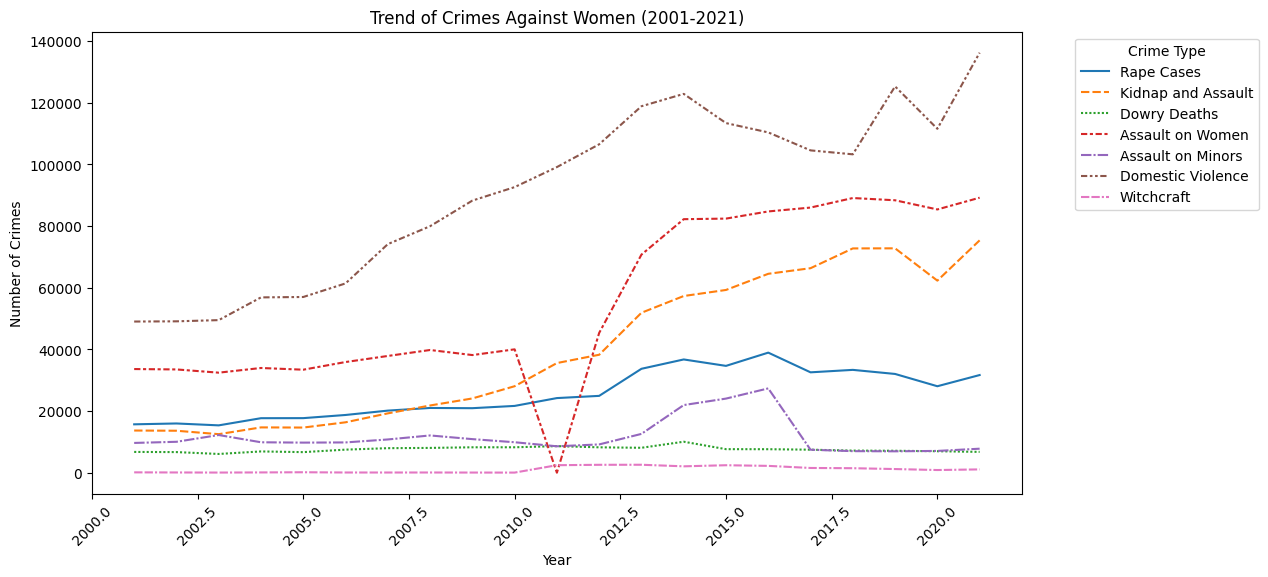

In [8]:
crime_trend = crimes_df_cleaned.groupby('Year').sum()

# Plotting the trend of different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

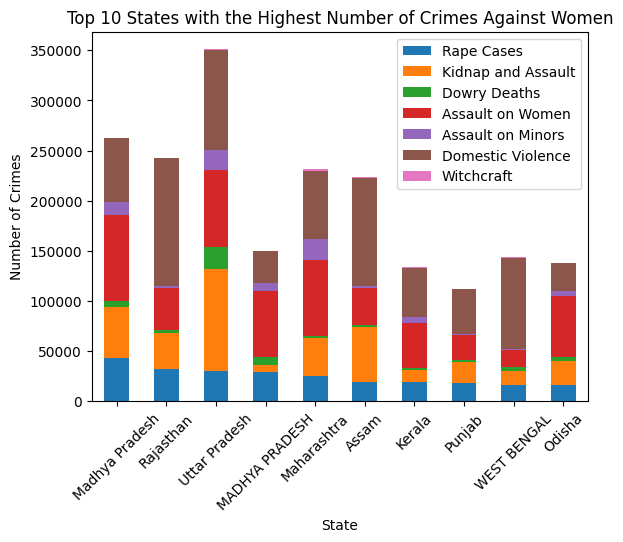

In [9]:
crimes_df_cleaned_eda = crimes_df_cleaned.drop(columns=['Year'])


# Total crimes by state
state_crime = crimes_df_cleaned_eda.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

# Top 10 states with the highest number of crimes
top_states = state_crime.head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 States with the Highest Number of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

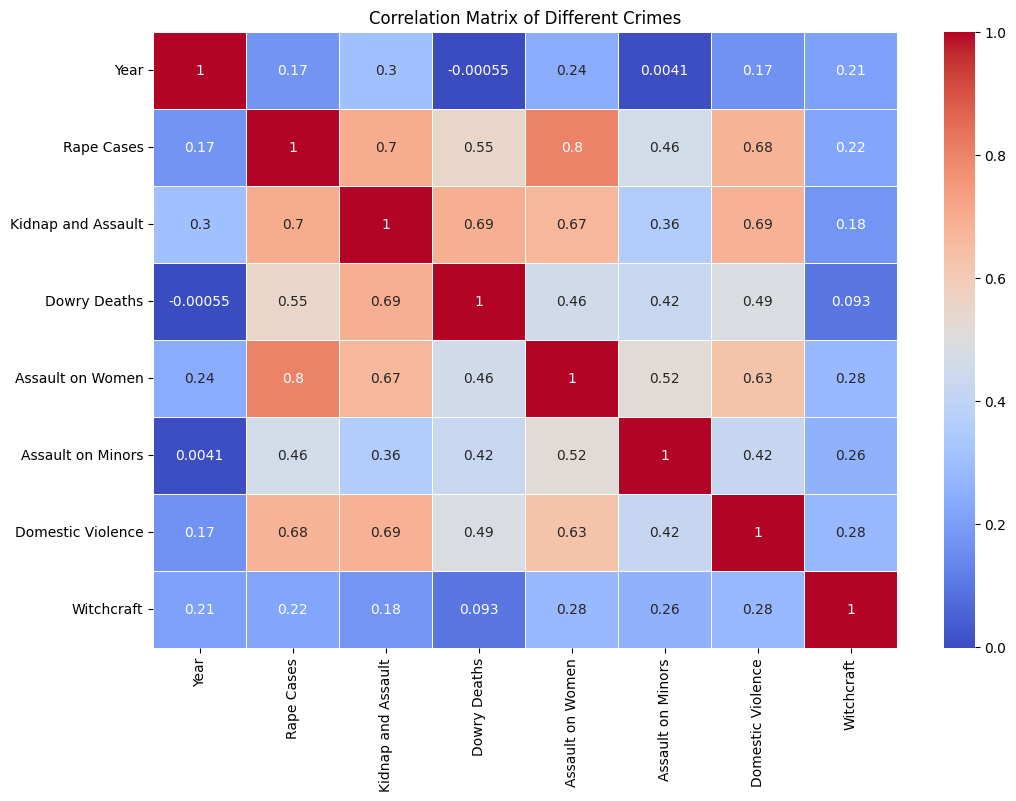

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = crimes_df_cleaned.drop(['State'], axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Different Crimes')
plt.show()


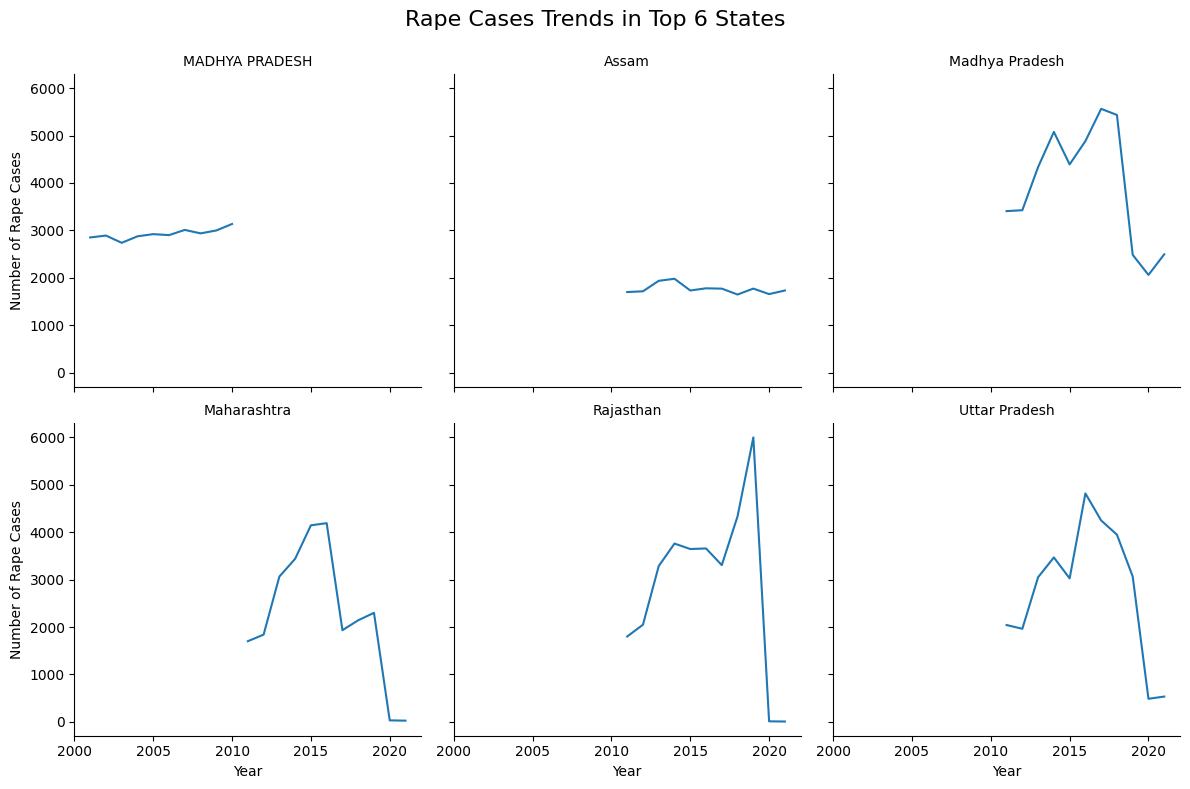

In [11]:
import seaborn as sns

# Select top N states by total crime numbers
top_n_states = crimes_df_cleaned.groupby('State').sum().nlargest(6, 'Rape Cases').index

# Filter data for these states
filtered_df = crimes_df_cleaned[crimes_df_cleaned['State'].isin(top_n_states)]

# Create a facet grid to show trends over the years
g = sns.FacetGrid(filtered_df, col="State", col_wrap=3, height=4)
g.map(sns.lineplot, 'Year', 'Rape Cases')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Rape Cases")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rape Cases Trends in Top 6 States', fontsize=16)
plt.show()

In [12]:
X = crimes_df_cleaned[['Year', 'Kidnap and Assault', 'Dowry Deaths',
                       'Assault on Women', 'Assault on Minors',
                       'Domestic Violence', 'Witchcraft']]
y = crimes_df_cleaned['Rape Cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 276.8589216426442
R^2 Score: 0.6926719130461758


In [13]:
X = crimes_df_cleaned[['Year', 'Kidnap and Assault', 'Dowry Deaths',
                       'Assault on Women', 'Assault on Minors',
                       'Domestic Violence', 'Witchcraft']]
y = crimes_df_cleaned['Rape Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Absolute Error: {mae}")
print(f"Random Forest - R² Score: {r2}")

Random Forest - Mean Absolute Error: 138.95131221719458
Random Forest - R² Score: 0.8577575820724136


In [15]:
#LINEAR REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (adjust based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values

# Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor for each crime category
models = {}
for column in y.columns:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_rf_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Example user input
state_input = 'Delhi'
year_input = 2014
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")


Predicted crime statistics for Delhi in 2014:
Rape: 9.31
K&A: 6.17
DD: 0.00
AoW: 22.56
AoM: 2.94
DV: 3.40
WT: 0.10


In [16]:
#RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (adjust based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values

# Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor for each crime category
models = {}
for column in y.columns:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_rf_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Example user input
state_input = 'Assam'
year_input = 2001
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")

Predicted crime statistics for Assam in 2001:
Rape: 2.84
K&A: 1.89
DD: 0.00
AoW: 15.52
AoM: 0.99
DV: 8.32
WT: 0.00


Predicted crime statistics for Assam in 2001:
Rape: 2.84
K&A: 1.89
DD: 0.00
AoW: 15.52
AoM: 0.99
DV: 8.32
WT: 0.00


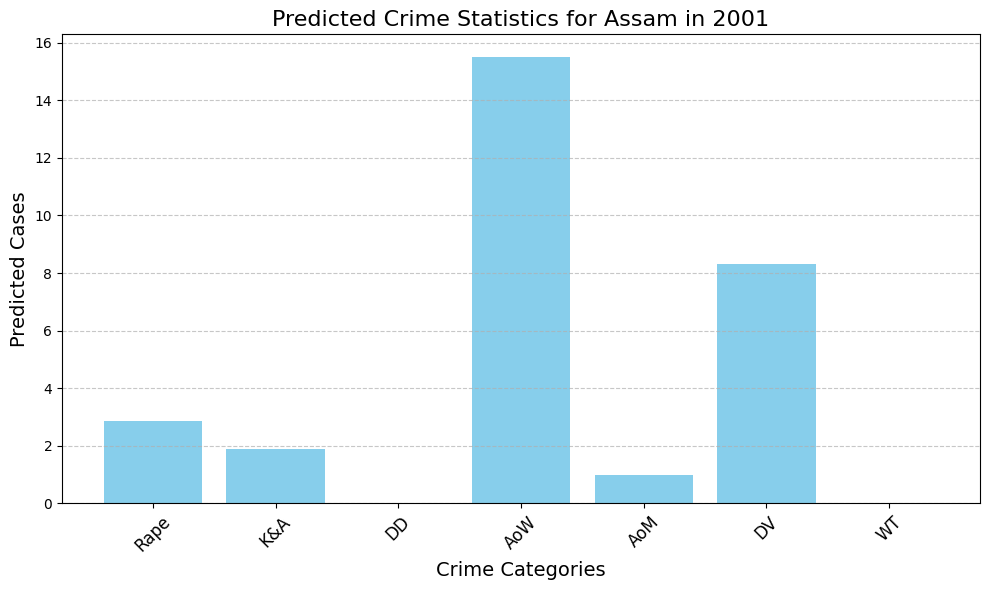

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (adjust based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values

# Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor for each crime category
models = {}
for column in y.columns:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_rf_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Visualization Function
def plot_predictions(predictions, state, year):
    categories = list(predictions.keys())
    values = list(predictions.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='skyblue')
    plt.title(f"Predicted Crime Statistics for {state} in {year}", fontsize=16)
    plt.xlabel("Crime Categories", fontsize=14)
    plt.ylabel("Predicted Cases", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example user input
state_input = 'Assam'
year_input = 2001
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")

# Plot the predictions
plot_predictions(predicted_crimes, state_input, year_input)


Predicted crime statistics for Delhi from 2001 to 2005:
   Rape   K&A    DD    AoW   AoM    DV   WT  Year
0  2.84  1.89  0.00  15.52  0.99  8.32  0.0  2001
1  2.42  1.45  0.00  13.08  2.02  4.29  0.0  2002
2  2.48  1.82  0.01   9.38  1.76  5.39  0.0  2003
3  7.38  2.59  0.00   8.15  2.08  4.88  0.0  2004
4  4.74  2.94  0.03   7.73  1.22  4.01  0.0  2005


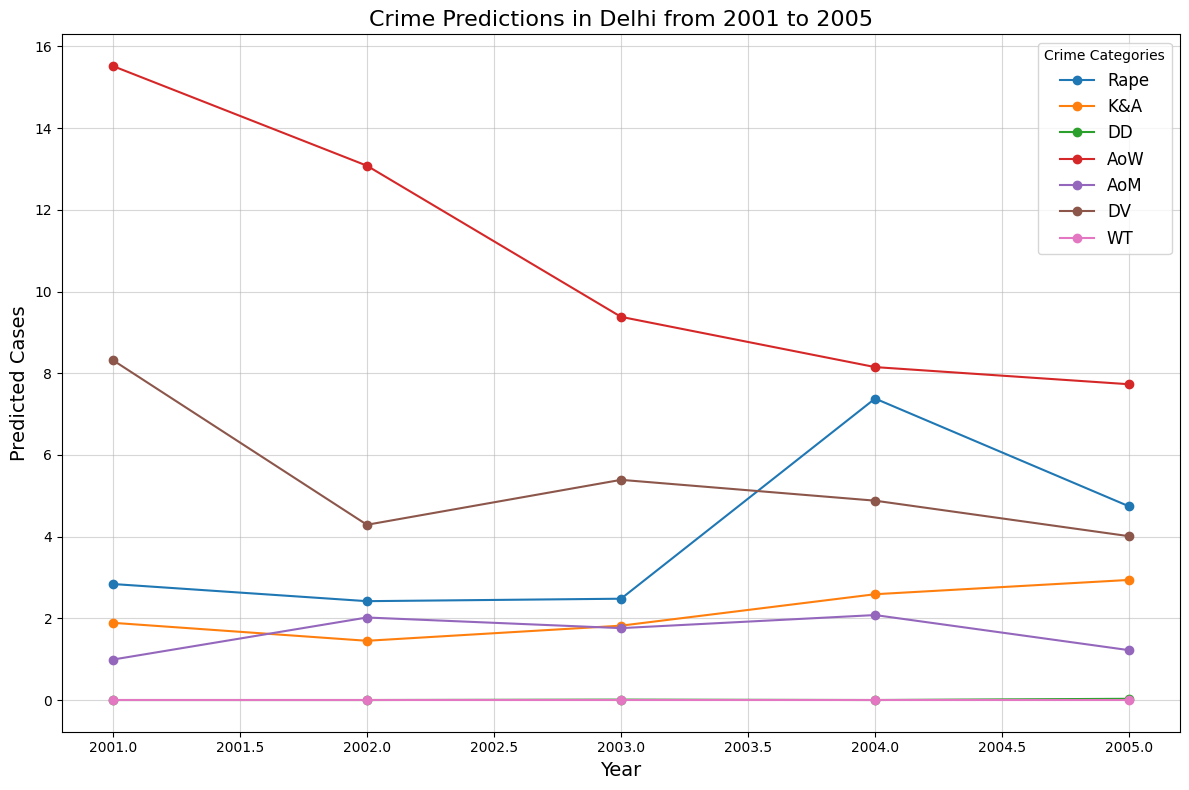

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values

# Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor for each crime category
models = {}
for column in y.columns:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_rf_model.pkl")

# Prediction Function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Function to Predict for Multiple Years
def predict_for_years(state, start_year, end_year):
    all_predictions = []
    for year in range(start_year, end_year + 1):
        predictions = predict_crimes(state, year)
        predictions['Year'] = year
        all_predictions.append(predictions)
    return pd.DataFrame(all_predictions)

# Predict for Delhi from 2001 to 2005
state_input = 'Delhi'
start_year = 2001
end_year = 2005
predictions_df = predict_for_years(state_input, start_year, end_year)

# Print Predictions
print(f"Predicted crime statistics for {state_input} from {start_year} to {end_year}:")
print(predictions_df)

# Plot the Predictions
def plot_predictions_over_years(predictions_df, state):
    plt.figure(figsize=(12, 8))
    for crime in predictions_df.columns.drop('Year'):
        plt.plot(predictions_df['Year'], predictions_df[crime], marker='o', label=crime)

    plt.title(f"Crime Predictions in {state} from {start_year} to {end_year}", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Predicted Cases", fontsize=14)
    plt.legend(title="Crime Categories", fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_predictions_over_years(predictions_df, state_input)


Average crime statistics for Delhi from 2001 to 2005:
Rape: 3.97
K&A: 2.14
DD: 0.01
AoW: 10.77
AoM: 1.61
DV: 5.38
WT: 0.00


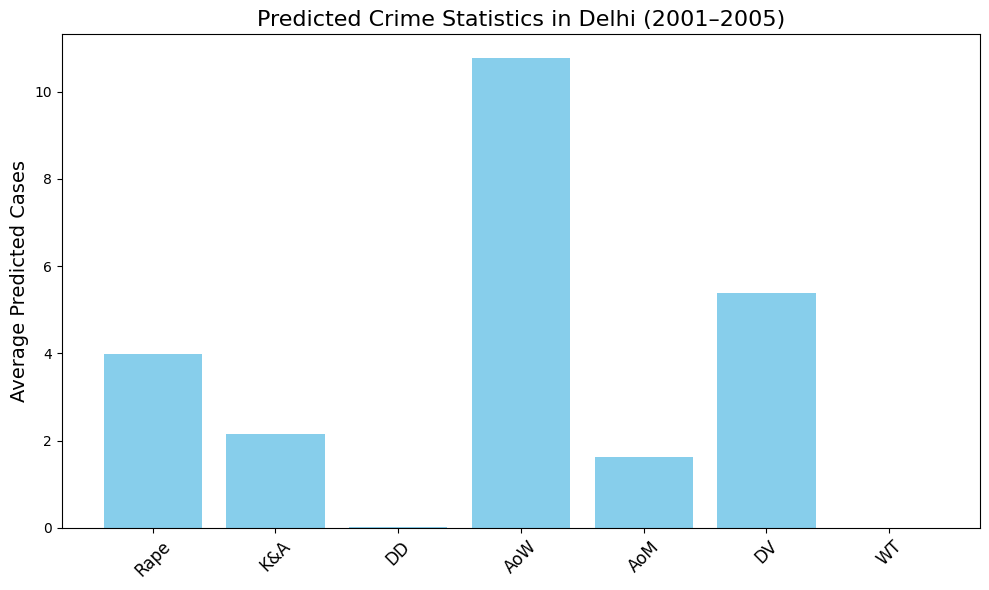

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values

# Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor for each crime category
models = {}
for column in y.columns:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_rf_model.pkl")

# Prediction Function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Function to Calculate Average Predictions for a Range of Years
def calculate_average_predictions(state, start_year, end_year):
    total_predictions = {crime: 0 for crime in models.keys()}
    year_count = 0

    for year in range(start_year, end_year + 1):
        predictions = predict_crimes(state, year)
        for crime, value in predictions.items():
            total_predictions[crime] += value
        year_count += 1

    # Calculate averages
    avg_predictions = {crime: total / year_count for crime, total in total_predictions.items()}
    return avg_predictions

# Calculate average predictions for Delhi (2001–2005)
state_input = 'Delhi'
start_year = 2001
end_year = 2005
average_predictions = calculate_average_predictions(state_input, start_year, end_year)

# Display the results
print(f"Average crime statistics for {state_input} from {start_year} to {end_year}:")
for crime, avg in average_predictions.items():
    print(f"{crime}: {avg:.2f}")

# Optional: Visualize the Averages
def plot_average_predictions(average_predictions, state):
    plt.figure(figsize=(10, 6))
    crimes = list(average_predictions.keys())
    averages = list(average_predictions.values())

    plt.bar(crimes, averages, color='skyblue')
    plt.title(f"Predicted Crime Statistics in {state} (2001–2005)", fontsize=16)
    plt.ylabel("Average Predicted Cases", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

plot_average_predictions(average_predictions, state_input)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (update based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values
# Example: Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model for each crime category
models = {}
for column in y.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[column])
    models[column] = model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Example user input
state_input = 'Delhi'
year_input = 2025
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")

Predicted crime statistics for Delhi in 2025:
Rape: 446.50
K&A: 1702.33
DD: -14.86
AoW: 2477.89
AoM: -107.85
DV: 2767.98
WT: -56.40


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (update based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values
# Example: Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model for each crime category
models = {}
for column in y.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[column])
    models[column] = model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Example user input
state_input = 'Maharashtra'
year_input = 2030
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")

Predicted crime statistics for Maharashtra in 2030:
Rape: 548.92
K&A: 2095.60
DD: -18.34
AoW: 3048.15
AoM: -133.32
DV: 3406.72
WT: -69.46


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update with your file path
crimes_df = pd.read_csv(file_path)

# Clean and preprocess the dataset (update based on your actual dataset structure)
crimes_df_cleaned = crimes_df.dropna()  # Drop rows with missing values
# Example: Assume columns are ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
X = crimes_df_cleaned[['State', 'Year']]
y = crimes_df_cleaned[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

# Convert categorical 'State' to numerical data
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model for each crime category
models = {}
for column in y.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[column])
    models[column] = model

# Save the models (optional)
for crime, model in models.items():
    joblib.dump(model, f"{crime}_model.pkl")

# Create a prediction function
def predict_crimes(state, year):
    # Convert user input into a format suitable for the model
    user_input = pd.DataFrame({'Year': [year], 'State': [state]})
    user_input = pd.get_dummies(user_input, columns=['State'], drop_first=True)

    # Ensure all required columns are present
    for col in X.columns:
        if col not in user_input:
            user_input[col] = 0

    # Predict for each category
    predictions = {}
    for crime, model in models.items():
        predictions[crime] = model.predict(user_input)[0]

    return predictions

# Example user input
state_input = 'Uttar Pradesh'
year_input = 2050
predicted_crimes = predict_crimes(state_input, year_input)

# Print predictions
print(f"Predicted crime statistics for {state_input} in {year_input}:")
for crime, value in predicted_crimes.items():
    print(f"{crime}: {value:.2f}")

Predicted crime statistics for Uttar Pradesh in 2050:
Rape: 958.64
K&A: 3668.68
DD: -32.28
AoW: 5329.16
AoM: -235.22
DV: 5961.70
WT: -121.68
